<a href="https://colab.research.google.com/github/hackdavid/classification-of-julie-and-mendalport/blob/master/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Found 1600 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
data batch shape: (10, 128, 128, 3)
label batch shape: (10, 2)
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 96)        295008    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 96)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 15, 15, 96)        384       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 15, 15, 256)       6291712   
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 256)         0         
___________________________

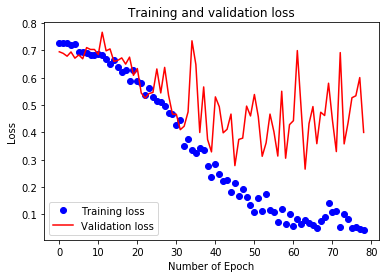

In [0]:
#alex net model
import os
import tensorflow as tf
import matplotlib.pyplot as plt

#base_dir = r"F:/machine learning/FaceDetection-master/julia-mendalbort/"  #path of folder which contain train,test,and valid
base='julia-mendalbort'
train_dir = os.path.join(base, 'train')
val_dir = os.path.join(base, 'valid')
test_dir = os.path.join(base, 'test')

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(128,128), color_mode='rgb', batch_size=10, class_mode='categorical',shuffle=True)
val_generator = train_datagen.flow_from_directory(val_dir, target_size=(128, 128), color_mode='rgb', batch_size=10, class_mode='categorical')

for data_batch, label_batch in train_generator:
    print('data batch shape:',data_batch.shape)
    print('label batch shape:', label_batch.shape)
    break


model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(filters=96, kernel_size=(32, 32), activation='relu', strides=(4,4), padding='same', input_shape=(128, 128, 3)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=2))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(16, 16), activation='relu', strides=(1,1), padding='same', input_shape=(128, 128, 3)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=2))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(filters=384, kernel_size=(8, 8), activation='relu', strides=(1,1), padding='same', input_shape=(128, 128, 3)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=2))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(filters=384, kernel_size=(5, 5), activation='relu', strides=(1,1), padding='same', input_shape=(128, 128, 3)))
model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu', strides=(1,1), padding='same', input_shape=(128, 128, 3)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.50))
model.add(tf.keras.layers.Dense(4096, activation=tf.nn.relu))
model.add(tf.keras.layers.Dropout(0.50))
model.add(tf.keras.layers.Dense(4096, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(2, activation=tf.nn.softmax))

model.summary()
model.compile(optimizer=tf.keras.optimizers.SGD(), loss='categorical_crossentropy', metrics=['accuracy'])

earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')
checkpoint = tf.keras.callbacks.ModelCheckpoint('model-epoch{epoch:02d}.h5py', monitor='val_acc', verbose=1,
                                                save_best_only=True, save_weights_only=False, mode='auto', period=1)

callbacks_list = [earlystop, checkpoint]
history = model.fit_generator(train_generator, steps_per_epoch=80, epochs=100, validation_data=val_generator,
                              validation_steps=10, verbose=2, callbacks=callbacks_list)


model.save('final_epoch.h5py')

accuracy = history.history['acc']
loss = history.history['loss']
val_accuracy = history.history['val_acc']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs,val_accuracy, 'r', label='Validation accuracy')
plt.xlabel('Number of Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig('model_alex_net_accuracy.png')
plt.gcf().clear()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Number of Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig('model_alex_net_loss.png')


In [0]:
#lenet model

import os
import tensorflow as tf
import matplotlib.pyplot as plt

#base_dir = r"F:/machine learning/FaceDetection-master/julia-mendalbort/"  #path of folder which contain train,test,and valid
base='julia-mendalbort'
train_dir = os.path.join(base, 'train')
val_dir = os.path.join(base, 'valid')
test_dir = os.path.join(base, 'test')

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(128,128), color_mode='rgb', batch_size=10, class_mode='categorical',shuffle=True)
val_generator = train_datagen.flow_from_directory(val_dir, target_size=(128, 128), color_mode='rgb', batch_size=10, class_mode='categorical')

for data_batch, label_batch in train_generator:
    print('data batch shape:',data_batch.shape)
    print('label batch shape:', label_batch.shape)
    break


model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(filters=6, kernel_size=(5, 5), activation='tanh', strides=(4,4), padding='same', input_shape=(32, 32, 3)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=1))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(5, 5), activation='tanh', strides=(1,1), padding='same', input_shape=(14, 14, 3)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=2))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(filters=384, kernel_size=(8, 8), activation='relu', strides=(1,1), padding='same', input_shape=(128, 128, 3)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=2))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(filters=384, kernel_size=(5, 5), activation='relu', strides=(1,1), padding='same', input_shape=(128, 128, 3)))
model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu', strides=(1,1), padding='same', input_shape=(128, 128, 3)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.50))
model.add(tf.keras.layers.Dense(4096, activation=tf.nn.relu))
model.add(tf.keras.layers.Dropout(0.50))
model.add(tf.keras.layers.Dense(4096, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(2, activation=tf.nn.softmax))

model.summary()
model.compile(optimizer=tf.keras.optimizers.SGD(), loss='categorical_crossentropy', metrics=['accuracy'])

earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')
checkpoint = tf.keras.callbacks.ModelCheckpoint('model-epoch{epoch:02d}.h5py', monitor='val_acc', verbose=1,
                                                save_best_only=True, save_weights_only=False, mode='auto', period=1)

callbacks_list = [earlystop, checkpoint]
history = model.fit_generator(train_generator, steps_per_epoch=80, epochs=100, validation_data=val_generator,
                              validation_steps=10, verbose=2, callbacks=callbacks_list)


model.save('final_epoch.h5py')

accuracy = history.history['acc']
loss = history.history['loss']
val_accuracy = history.history['val_acc']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs,val_accuracy, 'r', label='Validation accuracy')
plt.xlabel('Number of Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig('model_alex_net_accuracy.png')
plt.gcf().clear()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Number of Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig('model_alex_net_loss.png')


In [0]:
import zipfile
tar = zipfile.zipfile("julia-mendalbort.zip")
tar.extractall()
tar.close()

AttributeError: ignored

In [0]:
!unzip julia-mendalbort.zip

Archive:  julia-mendalbort.zip
   creating: julia-mendalbort/test/
   creating: julia-mendalbort/test/julia/
  inflating: julia-mendalbort/test/julia/image901.jpg  
  inflating: julia-mendalbort/test/julia/image902.jpg  
  inflating: julia-mendalbort/test/julia/image903.jpg  
  inflating: julia-mendalbort/test/julia/image904.jpg  
  inflating: julia-mendalbort/test/julia/image905.jpg  
  inflating: julia-mendalbort/test/julia/image906.jpg  
  inflating: julia-mendalbort/test/julia/image907.jpg  
  inflating: julia-mendalbort/test/julia/image908.jpg  
  inflating: julia-mendalbort/test/julia/image909.jpg  
  inflating: julia-mendalbort/test/julia/image910.jpg  
  inflating: julia-mendalbort/test/julia/image911.jpg  
  inflating: julia-mendalbort/test/julia/image912.jpg  
  inflating: julia-mendalbort/test/julia/image913.jpg  
  inflating: julia-mendalbort/test/julia/image914.jpg  
  inflating: julia-mendalbort/test/julia/image915.jpg  
  inflating: julia-mendalbort/test/julia/image916.j

In [0]:
import zipfile
#from google.colab import drive

#drive.mount('/content/drive/')

zip_ref = zipfile.ZipFile("julia-mendalbort.zip", 'r')
zip_ref.extractall()
zip_ref.close()